In [2]:
import pandas as pd
import numpy as np
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns
import imblearn
import shap
import lime

In [ ]:
file_path = "E:/carr/btech cse/computer/machine learning/credit card fraud detection/KAGGLEcreditcardfraudDataset.csv"
df = pd.read_csv(file_path)

display(df.head())
display(df.info())

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

None

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


,0
Time,124592
V1,275663
V2,275663
V3,275663
V4,275663
V5,275663
V6,275663
V7,275663
V8,275663
V9,275663


,count
Class,
0,284315
1,492


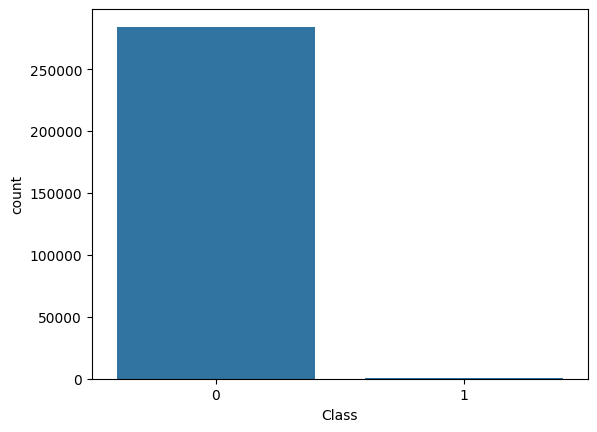

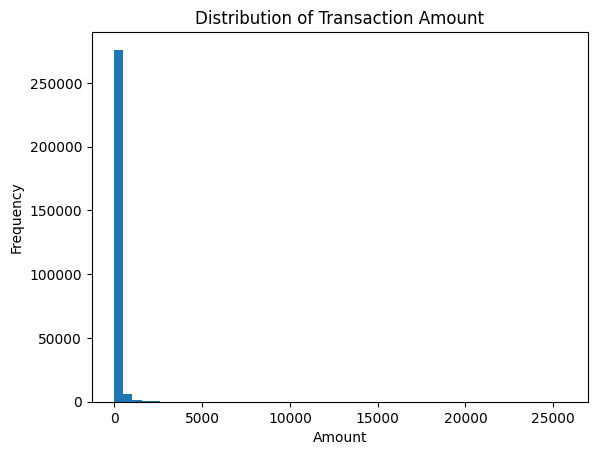

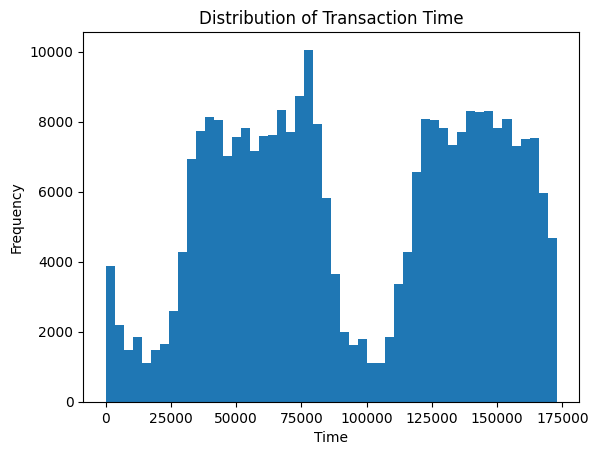

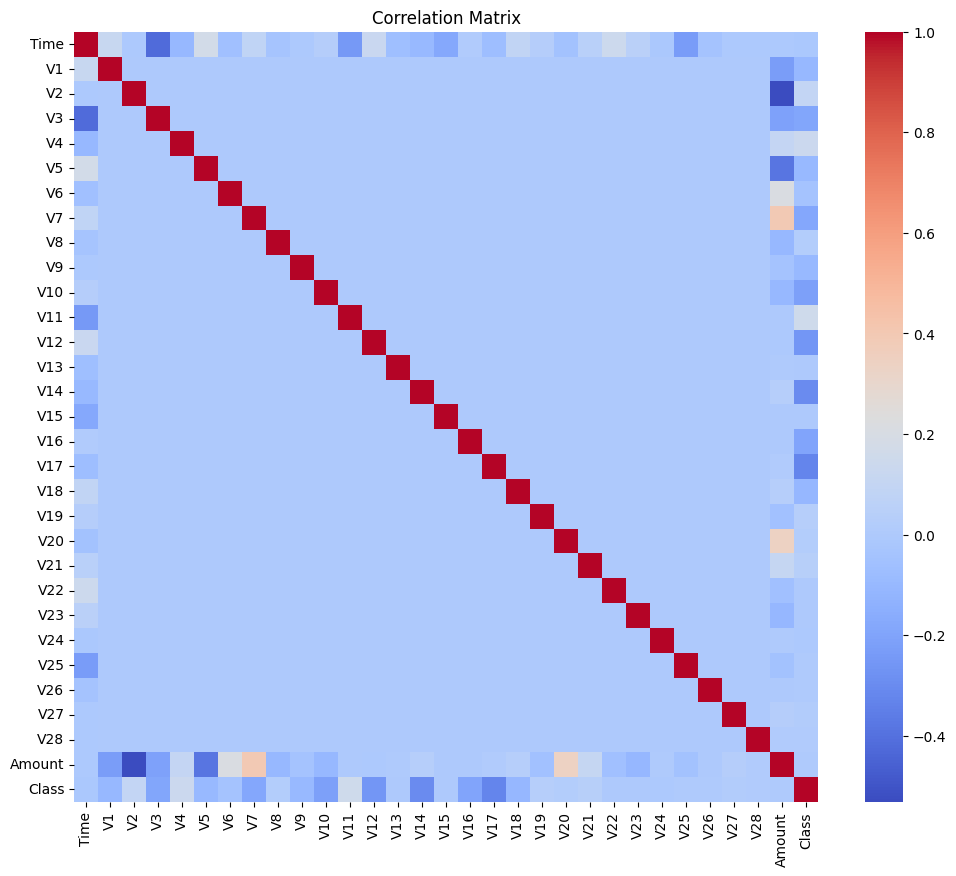

In [9]:
display(df.describe())
display(df.nunique())
display(df['Class'].value_counts())
sns.countplot(x='Class', data=df)
plt.show()
plt.hist(df['Amount'], bins=50)
plt.title('Distribution of Transaction Amount')
plt.xlabel('Amount')
plt.ylabel('Frequency')
plt.show()
plt.hist(df['Time'], bins=50)
plt.title('Distribution of Transaction Time')
plt.xlabel('Time')
plt.ylabel('Frequency')
plt.show()
correlation_matrix = df.corr()
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, cmap='coolwarm', annot=False)
plt.title('Correlation Matrix')
plt.show()

In [10]:
df['Hour'] = (df['Time'] / 3600).astype(int) % 24
df['Day'] = (df['Time'] / (3600 * 24)).astype(int)
df['V1_V2_interaction'] = df['V1'] * df['V2']
df['V3_Amount_interaction'] = df['V3'] * df['Amount']
df['Amount_per_Hour'] = df['Amount'] / (df['Hour'] + 1)
display(df.head())

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V26,V27,V28,Amount,Class,Hour,Day,V1_V2_interaction,V3_Amount_interaction,Amount_per_Hour
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.189115,0.133558,-0.021053,149.62,0,0,0,0.098968,379.488199,149.62
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,0.125895,-0.008983,0.014724,2.69,0,0,0,0.317214,0.447832,2.69
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,-0.139097,-0.055353,-0.059752,378.66,0,0,0,1.820416,671.443450,378.66
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.221929,0.062723,0.061458,123.50,0,0,0,0.178979,221.434677,123.50
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,0.502292,0.219422,0.215153,69.99,0,0,0,-1.016624,108.394762,69.99


In [11]:
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE

X = df.drop('Class', axis=1)
y = df['Class']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_scaled, y)

print("Shape of original features:", X.shape)
print("Shape of resampled features:", X_resampled.shape)
print("Shape of original target:", y.shape)
print("Shape of resampled target:", y_resampled.shape)
print("Value counts of original target:\n", y.value_counts())
print("Value counts of resampled target:\n", y_resampled.value_counts())

Shape of original features: (284807, 35)
Shape of resampled features: (568630, 35)
Shape of original target: (284807,)
Shape of resampled target: (568630,)
Value counts of original target:
 Class
0    284315
1       492
Name: count, dtype: int64
Value counts of resampled target:
 Class
0    284315
1    284315
Name: count, dtype: int64


In [12]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

log_reg_model = LogisticRegression()
log_reg_model.fit(X_train, y_train)

rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

gb_model = GradientBoostingClassifier(n_estimators=100, random_state=42)
gb_model.fit(X_train, y_train)

GradientBoostingClassifier(random_state=42)

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

log_reg_pred = log_reg_model.predict(X_test)
rf_pred = rf_model.predict(X_test)
gb_pred = gb_model.predict(X_test)

log_reg_accuracy = accuracy_score(y_test, log_reg_pred)
log_reg_precision = precision_score(y_test, log_reg_pred)
log_reg_recall = recall_score(y_test, log_reg_pred)
log_reg_f1 = f1_score(y_test, log_reg_pred)
log_reg_roc_auc = roc_auc_score(y_test, log_reg_model.predict_proba(X_test)[:, 1])

rf_accuracy = accuracy_score(y_test, rf_pred)
rf_precision = precision_score(y_test, rf_pred)
rf_recall = recall_score(y_test, rf_pred)
rf_f1 = f1_score(y_test, rf_pred)
rf_roc_auc = roc_auc_score(y_test, rf_model.predict_proba(X_test)[:, 1])

gb_accuracy = accuracy_score(y_test, gb_pred)
gb_precision = precision_score(y_test, gb_pred)
gb_recall = recall_score(y_test, gb_pred)
gb_f1 = f1_score(y_test, gb_pred)
gb_roc_auc = roc_auc_score(y_test, gb_model.predict_proba(X_test)[:, 1])

print("Logistic Regression Metrics:")
print(f"Accuracy: {log_reg_accuracy:.4f}")
print(f"Precision: {log_reg_precision:.4f}")
print(f"Recall: {log_reg_recall:.4f}")
print(f"F1-score: {log_reg_f1:.4f}")
print(f"ROC AUC: {log_reg_roc_auc:.4f}")

print("\nRandom Forest Metrics:")
print(f"Accuracy: {rf_accuracy:.4f}")
print(f"Precision: {rf_precision:.4f}")
print(f"Recall: {rf_recall:.4f}")
print(f"F1-score: {rf_f1:.4f}")
print(f"ROC AUC: {rf_roc_auc:.4f}")

print("\nGradient Boosting Metrics:")
print(f"Accuracy: {gb_accuracy:.4f}")
print(f"Precision: {gb_precision:.4f}")
print(f"Recall: {gb_recall:.4f}")
print(f"F1-score: {gb_f1:.4f}")
print(f"ROC AUC: {gb_roc_auc:.4f}")


if log_reg_recall >= rf_recall and log_reg_recall >= gb_recall:
    best_model = log_reg_model
    print("\nBest performing model is Logistic Regression based on Recall.")
elif rf_recall >= log_reg_recall and rf_recall >= gb_recall:
    best_model = rf_model
    print("\nBest performing model is Random Forest based on Recall.")
else:
    best_model = gb_model
    print("\nBest performing model is Gradient Boosting based on Recall.")

Logistic Regression Metrics:
Accuracy: 0.9532
Precision: 0.9721
Recall: 0.9333
F1-score: 0.9523
ROC AUC: 0.9913

Random Forest Metrics:
Accuracy: 0.9999
Precision: 0.9998
Recall: 1.0000
F1-score: 0.9999
ROC AUC: 1.0000

Gradient Boosting Metrics:
Accuracy: 0.9809
Precision: 0.9876
Recall: 0.9741
F1-score: 0.9808
ROC AUC: 0.9988

Best performing model is Random Forest based on Recall.


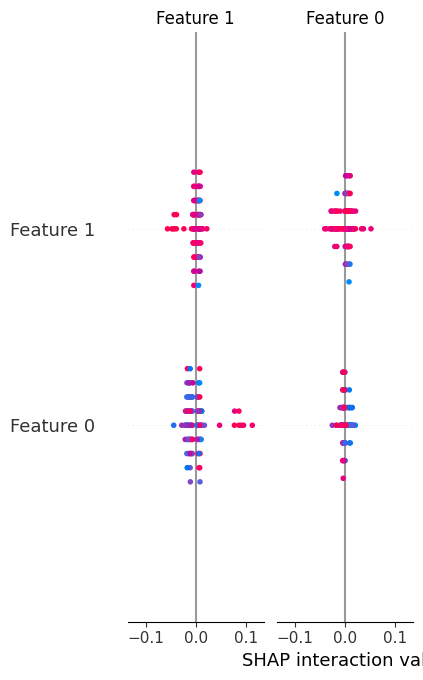

In [ ]:
import shap

explainer = shap.Explainer(best_model, X_train[:100])

shap_values = explainer(X_test[:100])

shap.summary_plot(shap_values, X_test[:100])

Optimal Threshold: 0.0000


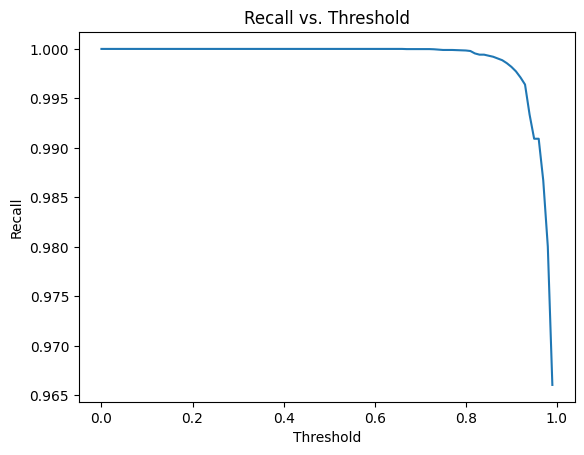

In [15]:
y_prob = best_model.predict_proba(X_test)[:, 1]

thresholds = np.arange(0, 1, 0.01)
recall_scores = []

for threshold in thresholds:
    y_pred_threshold = (y_prob >= threshold).astype(int)
    recall = recall_score(y_test, y_pred_threshold)
    recall_scores.append(recall)

optimal_threshold_index = np.argmax(recall_scores)
optimal_threshold = thresholds[optimal_threshold_index]

print(f"Optimal Threshold: {optimal_threshold:.4f}")

plt.plot(thresholds, recall_scores)
plt.title('Recall vs. Threshold')
plt.xlabel('Threshold')
plt.ylabel('Recall')
plt.show()

In [ ]:
import joblib

model_path = "/content/drive/My Drive/Colab Notebooks/credit card fraud detection/best_fraud_detection_model.joblib"
joblib.dump(best_model, model_path)
print(f"Model saved to: {"/content/drive/My Drive/Colab Notebooks/credit card fraud detection/best_fraud_detection_model.joblib"}")

Model saved to: /content/drive/My Drive/Colab Notebooks/credit card fraud detection/best_fraud_detection_model.joblib
